In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import tree
from sklearn import ensemble
import scipy.stats
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
complete = pd.read_csv('complete.csv')
complete = complete.drop(columns=['Unnamed: 0'])
complete.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,title,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,ROI,FICO,earnings
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,10.0,MORTGAGE,55000.0,Not Verified,Fully Paid,n,Debt consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,1.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,1.23,677.0,828.0
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,10.0,MORTGAGE,65000.0,Not Verified,Fully Paid,n,Business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,4.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,1.04,717.0,988.0
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,10.0,MORTGAGE,63000.0,Not Verified,Fully Paid,n,Other,IL,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,5.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,1.14,697.0,2800.0
3,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,3.0,MORTGAGE,104433.0,Source Verified,Fully Paid,n,Major purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,6.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,1.13,697.0,1352.0
4,11950.0,11950.0,11950.0,36.0,13.44,405.18,C,C3,4.0,RENT,34000.0,Source Verified,Fully Paid,n,Debt consolidation,GA,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,1.15,692.0,1792.5


In [4]:
incomplete = pd.read_csv('incomplete.csv')
incomplete = incomplete.drop(columns=['Unnamed: 0'])
incomplete.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,title,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,ROI,FICO
0,35000.0,35000.0,35000.0,60.0,14.85,829.90,C,C5,10.0,MORTGAGE,110000.0,Source Verified,Current,n,Debt consolidation,NJ,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.01,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,1.0,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N,0.90,787.0
1,22400.0,22400.0,22400.0,60.0,12.88,508.30,C,C2,6.0,MORTGAGE,95000.0,Not Verified,Current,n,Debt consolidation,SC,22.98,0.0,710.0,714.0,0.0,16.0,0.0,13028.0,32.7,35.0,w,9912.88,9912.88,19275.33,19275.33,12487.12,6788.21,0.0,0.0,0.0,508.30,589.0,585.0,0.0,1.0,Individual,0.0,0.0,376218.0,1.0,5.0,0.0,3.0,171328.0,67.0,3.0,6.0,8121.0,54.0,39800.0,1.0,5.0,0.0,9.0,23514.0,12617.0,39.9,0.0,0.0,5.0,2.0,3.0,8.0,4.0,5.0,15.0,10.0,15.0,8.0,16.0,0.0,0.0,0.0,3.0,97.0,25.0,0.0,0.0,436841.0,184356.0,21000.0,191682.0,N,Cash,N,0.86,712.0
2,16000.0,16000.0,16000.0,60.0,12.88,363.07,C,C2,1.0,MORTGAGE,70000.0,Not Verified,Current,n,Debt consolidation,TX,26.40,0.0,720.0,724.0,0.0,13.0,0.0,28705.0,56.3,29.0,w,7080.70,7080.70,13768.04,13768.04,8919.30,4848.74,0.0,0.0,0.0,363.07,754.0,750.0,0.0,1.0,Individual,0.0,0.0,265836.0,0.0,2.0,0.0,2.0,33702.0,74.0,1.0,1.0,8739.0,64.0,51000.0,0.0,0.0,1.0,3.0,24167.0,17922.0,61.0,0.0,0.0,2.0,0.0,4.0,6.0,5.0,12.0,6.0,10.0,21.0,6.0,13.0,0.0,0.0,0.0,1.0,100.0,60.0,0.0,0.0,309638.0,62407.0,45900.0,45838.0,N,Cash,N,0.86,722.0
3,23000.0,23000.0,23000.0,60.0,8.49,471.77,B,B1,5.0,RENT,64000.0,Not Verified,Current,n,Credit card refinancing,NY,18.28,0.0,700.0,704.0,0.0,21.0,0.0,24940.0,52.7,33.0,w,9580.20,9580.20,17900.14,17900.14,13419.80,4480.34,0.0,0.0,0.0,471.77,744.0,740.0,0.0,1.0,Individual,0.0,0.0,63886.0,0.0,7.0,0.0,0.0,38946.0,84.0,2.0,3.0,9516.0,68.0,47300.0,0.0,3.0,1.0,3.0,3549.0,15603.0,60.5,0.0,0.0,0.0,0.0,6.0,8.0,7.0,8.0,14.0,14.0,19.0,8.0,21.0,0.0,0.0,0.0,2.0,87.9,14.3,0.0,0.0,93962.0,63886.0,39500.0,46662.0,N,Cash,N,0.78,702.0
4,16800.0,16800.0,16800.0,60.0,12.88,381.23,C,C2,10.0,MORTGAGE,118000.0,Not Verified,Current,n,Debt consolidation,MO,34.29,0.0,680.0,684.0,0.0,11.0,1.0,7849.0,24.1,46.0,w,7434.43,7434.43,14456.69,14456.69,9365.57,5091.12,0.0,0.0,0.0,381.23,759.0,755.0,0.0,1.0,Individual,0.0,0.0,314793.0,0.0,4.0,0.0,4.0,67959.0,67.0,1.0,1.0,4746.0,53.0,32600.0,2.0,8.0,1.0,6.0,28618.0,4751.0,62.3,0.0,0.0,4.0,12.0,3.0,3.0,4.0,22.0,12.0,5.0,28.0,3.0,11.0,0.0,0.0,0.0,1.0,64.4,25.0,0.0,0.0,412771.0,75808.0,12600.0,115941.0,N,Cash,N,0.86,682.0


In [5]:
# Create a second dataset without the LendingClub grades and columns that would allow model to "cheat"
complete_ng = complete.copy()
complete_ng = complete_ng.drop(columns=['grade','sub_grade','loan_status','total_pymnt','total_rec_prncp',
                                       'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'])
complete_ng.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,title,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt_inv,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,ROI,FICO,earnings
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,10.0,MORTGAGE,55000.0,Not Verified,n,Debt consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.72,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,1.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,1.23,677.0,828.0
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,10.0,MORTGAGE,65000.0,Not Verified,n,Business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.66,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,4.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,1.04,717.0,988.0
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,10.0,MORTGAGE,63000.0,Not Verified,n,Other,IL,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.92,15813.30,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,5.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,1.14,697.0,2800.0
3,10400.0,10400.0,10400.0,60.0,22.45,289.91,3.0,MORTGAGE,104433.0,Source Verified,n,Major purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.50,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,6.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,1.13,697.0,1352.0
4,11950.0,11950.0,11950.0,36.0,13.44,405.18,4.0,RENT,34000.0,Source Verified,n,Debt consolidation,GA,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.95,7653.56,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,1.15,692.0,1792.5


In [6]:
complete_ng.shape

(1347826, 85)

In [7]:
#Dummify object columns
#complete_ngd = pd.get_dummies(complete_ng, columns = complete_ng.select_dtypes(include='object').columns,drop_first=True)
#complete_ngd.info()

# dataset too large to dummify. Try models first with only float columns
complete_f = complete_ng.select_dtypes(include='float64')
complete_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347826 entries, 0 to 1347825
Data columns (total 75 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1347826 non-null  float64
 1   funded_amnt                 1347826 non-null  float64
 2   funded_amnt_inv             1347826 non-null  float64
 3   term                        1347826 non-null  float64
 4   int_rate                    1347826 non-null  float64
 5   installment                 1347826 non-null  float64
 6   emp_length                  1347826 non-null  float64
 7   annual_inc                  1347826 non-null  float64
 8   dti                         1347826 non-null  float64
 9   delinq_2yrs                 1347826 non-null  float64
 10  fico_range_low              1347826 non-null  float64
 11  fico_range_high             1347826 non-null  float64
 12  inq_last_6mths              1347826 non-null  float64
 1

In [8]:
incomplete_ng = incomplete.copy()
incomplete_ng = incomplete_ng.drop(columns=['grade','sub_grade','loan_status','total_pymnt','total_rec_prncp',
                                       'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'])
incomplete_ng.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,title,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt_inv,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,ROI,FICO
0,35000.0,35000.0,35000.0,60.0,14.85,829.90,10.0,MORTGAGE,110000.0,Source Verified,n,Debt consolidation,NJ,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.01,829.90,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,1.0,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N,0.90,787.0
1,22400.0,22400.0,22400.0,60.0,12.88,508.30,6.0,MORTGAGE,95000.0,Not Verified,n,Debt consolidation,SC,22.98,0.0,710.0,714.0,0.0,16.0,0.0,13028.0,32.7,35.0,w,9912.88,9912.88,19275.33,508.30,589.0,585.0,0.0,1.0,Individual,0.0,0.0,376218.0,1.0,5.0,0.0,3.0,171328.0,67.0,3.0,6.0,8121.0,54.0,39800.0,1.0,5.0,0.0,9.0,23514.0,12617.0,39.9,0.0,0.0,5.0,2.0,3.0,8.0,4.0,5.0,15.0,10.0,15.0,8.0,16.0,0.0,0.0,0.0,3.0,97.0,25.0,0.0,0.0,436841.0,184356.0,21000.0,191682.0,N,Cash,N,0.86,712.0
2,16000.0,16000.0,16000.0,60.0,12.88,363.07,1.0,MORTGAGE,70000.0,Not Verified,n,Debt consolidation,TX,26.40,0.0,720.0,724.0,0.0,13.0,0.0,28705.0,56.3,29.0,w,7080.70,7080.70,13768.04,363.07,754.0,750.0,0.0,1.0,Individual,0.0,0.0,265836.0,0.0,2.0,0.0,2.0,33702.0,74.0,1.0,1.0,8739.0,64.0,51000.0,0.0,0.0,1.0,3.0,24167.0,17922.0,61.0,0.0,0.0,2.0,0.0,4.0,6.0,5.0,12.0,6.0,10.0,21.0,6.0,13.0,0.0,0.0,0.0,1.0,100.0,60.0,0.0,0.0,309638.0,62407.0,45900.0,45838.0,N,Cash,N,0.86,722.0
3,23000.0,23000.0,23000.0,60.0,8.49,471.77,5.0,RENT,64000.0,Not Verified,n,Credit card refinancing,NY,18.28,0.0,700.0,704.0,0.0,21.0,0.0,24940.0,52.7,33.0,w,9580.20,9580.20,17900.14,471.77,744.0,740.0,0.0,1.0,Individual,0.0,0.0,63886.0,0.0,7.0,0.0,0.0,38946.0,84.0,2.0,3.0,9516.0,68.0,47300.0,0.0,3.0,1.0,3.0,3549.0,15603.0,60.5,0.0,0.0,0.0,0.0,6.0,8.0,7.0,8.0,14.0,14.0,19.0,8.0,21.0,0.0,0.0,0.0,2.0,87.9,14.3,0.0,0.0,93962.0,63886.0,39500.0,46662.0,N,Cash,N,0.78,702.0
4,16800.0,16800.0,16800.0,60.0,12.88,381.23,10.0,MORTGAGE,118000.0,Not Verified,n,Debt consolidation,MO,34.29,0.0,680.0,684.0,0.0,11.0,1.0,7849.0,24.1,46.0,w,7434.43,7434.43,14456.69,381.23,759.0,755.0,0.0,1.0,Individual,0.0,0.0,314793.0,0.0,4.0,0.0,4.0,67959.0,67.0,1.0,1.0,4746.0,53.0,32600.0,2.0,8.0,1.0,6.0,28618.0,4751.0,62.3,0.0,0.0,4.0,12.0,3.0,3.0,4.0,22.0,12.0,5.0,28.0,3.0,11.0,0.0,0.0,0.0,1.0,64.4,25.0,0.0,0.0,412771.0,75808.0,12600.0,115941.0,N,Cash,N,0.86,682.0


In [9]:
complete_f1 = complete_f.iloc[:10000]
complete_f1.shape

(10000, 75)

In [10]:
incomplete_f = incomplete_ng.select_dtypes(include='float64')
incomplete_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912609 entries, 0 to 912608
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   912609 non-null  float64
 1   funded_amnt                 912609 non-null  float64
 2   funded_amnt_inv             912609 non-null  float64
 3   term                        912609 non-null  float64
 4   int_rate                    912609 non-null  float64
 5   installment                 912609 non-null  float64
 6   emp_length                  912609 non-null  float64
 7   annual_inc                  912609 non-null  float64
 8   dti                         912609 non-null  float64
 9   delinq_2yrs                 912609 non-null  float64
 10  fico_range_low              912609 non-null  float64
 11  fico_range_high             912609 non-null  float64
 12  inq_last_6mths              912609 non-null  float64
 13  open_acc      

In [11]:
incomplete_f1 = incomplete_f.select_dtypes(include='float64')
incomplete_f1 = incomplete_f1.iloc[:10000]
incomplete_f1.shape

(10000, 74)

## Predictive Models

In [12]:
yRF = complete_f1['ROI']
XRF = complete_f1.drop(['ROI','earnings'],axis=1)

XRF_train, XRF_test, yRF_train, yRF_test = train_test_split(XRF, yRF, test_size=0.2,random_state = 2)

RF = ensemble.RandomForestRegressor(random_state=2)
RF.fit(XRF_train,yRF_train)

yRF_pred = RF.predict(XRF_test)

RFr2 = r2_score(yRF_test, yRF_pred)
RFcvr2 = cross_val_score(RF,XRF,yRF,cv = 5).mean()

RFr2train = r2_score(yRF_train,RF.predict(XRF_train))

print('The test r2 score is:', RFr2)
print('The train r2 score is:', RFr2train)
print('The cross validation r2 score is:', RFcvr2)

The test r2 score is: 0.9417582861590119
The train r2 score is: 0.9918399376862062
The cross validation r2 score is: 0.9413195186410759


In [13]:
resultRF = incomplete_f1.assign(result = RF.predict(incomplete_f1.drop(['ROI'],axis=1)))
resultRF['result'] = resultRF['result'].round(2)

In [14]:
resultRF

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt_inv,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,ROI,FICO,result
0,35000.0,35000.0,35000.0,60.0,14.85,829.90,10.0,110000.0,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,15897.65,15897.65,31464.01,829.90,679.0,675.0,0.0,1.0,0.0,0.0,301500.0,1.00000,1.000000,0.000000,1.000000,12609.000000,70.00000,1.000000,1.000000,6987.000000,45.000000,67300.0,0.000000,1.000000,0.000000,2.0,23192.0,54962.0,12.1,0.0,0.0,1.0,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,0.90,787.0,1.15
1,22400.0,22400.0,22400.0,60.0,12.88,508.30,6.0,95000.0,22.98,0.0,710.0,714.0,0.0,16.0,0.0,13028.0,32.7,35.0,9912.88,9912.88,19275.33,508.30,589.0,585.0,0.0,1.0,0.0,0.0,376218.0,1.00000,5.000000,0.000000,3.000000,171328.000000,67.00000,3.000000,6.000000,8121.000000,54.000000,39800.0,1.000000,5.000000,0.000000,9.0,23514.0,12617.0,39.9,0.0,0.0,5.0,2.0,3.0,8.0,4.0,5.0,15.0,10.0,15.0,8.0,16.0,0.0,0.0,0.0,3.0,97.0,25.0,0.0,0.0,436841.0,184356.0,21000.0,191682.0,0.86,712.0,0.82
2,16000.0,16000.0,16000.0,60.0,12.88,363.07,1.0,70000.0,26.40,0.0,720.0,724.0,0.0,13.0,0.0,28705.0,56.3,29.0,7080.70,7080.70,13768.04,363.07,754.0,750.0,0.0,1.0,0.0,0.0,265836.0,0.00000,2.000000,0.000000,2.000000,33702.000000,74.00000,1.000000,1.000000,8739.000000,64.000000,51000.0,0.000000,0.000000,1.000000,3.0,24167.0,17922.0,61.0,0.0,0.0,2.0,0.0,4.0,6.0,5.0,12.0,6.0,10.0,21.0,6.0,13.0,0.0,0.0,0.0,1.0,100.0,60.0,0.0,0.0,309638.0,62407.0,45900.0,45838.0,0.86,722.0,1.07
3,23000.0,23000.0,23000.0,60.0,8.49,471.77,5.0,64000.0,18.28,0.0,700.0,704.0,0.0,21.0,0.0,24940.0,52.7,33.0,9580.20,9580.20,17900.14,471.77,744.0,740.0,0.0,1.0,0.0,0.0,63886.0,0.00000,7.000000,0.000000,0.000000,38946.000000,84.00000,2.000000,3.000000,9516.000000,68.000000,47300.0,0.000000,3.000000,1.000000,3.0,3549.0,15603.0,60.5,0.0,0.0,0.0,0.0,6.0,8.0,7.0,8.0,14.0,14.0,19.0,8.0,21.0,0.0,0.0,0.0,2.0,87.9,14.3,0.0,0.0,93962.0,63886.0,39500.0,46662.0,0.78,702.0,1.09
4,16800.0,16800.0,16800.0,60.0,12.88,381.23,10.0,118000.0,34.29,0.0,680.0,684.0,0.0,11.0,1.0,7849.0,24.1,46.0,7434.43,7434.43,14456.69,381.23,759.0,755.0,0.0,1.0,0.0,0.0,314793.0,0.00000,4.000000,0.000000,4.000000,67959.000000,67.00000,1.000000,1.000000,4746.000000,53.000000,32600.0,2.000000,8.000000,1.000000,6.0,28618.0,4751.0,62.3,0.0,0.0,4.0,12.0,3.0,3.0,4.0,22.0,12.0,5.0,28.0,3.0,11.0,0.0,0.0,0.0,1.0,64.4,25.0,0.0,0.0,412771.0,75808.0,12600.0,115941.0,0.86,682.0,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24000.0,24000.0,24000.0,60.0,19.19,625.09,7.0,70000.0,23.49,0.0,665.0,669.0,0.0,7.0,1.0,7088.0,89.7,8.0,10172.50,10172.50,25603.10,625.09,669.0,665.0,0.0,1.0,0.0,0.0,48565.0,0.93442,2.779407,0.676431,1.562752,35506.645268,69.14098,1.290133,2.749923,5806.392905,57.032295,7900.0,1.012867,1.477304,2.036667,2.0,6938.

result = incomplete_f1.assign(result = RF.predict(incomplete_f1.drop(['ROI'],axis=1)))
result

In [15]:
yL = complete_f1['ROI']
XL = complete_f1.drop(['ROI','earnings'],axis=1)

XL_train, XL_test, yL_train, yL_test = train_test_split(XL, yL, test_size=0.2,random_state = 2)

lasso = Lasso(alpha = 0.0001)
lasso.fit(XL_train,yL_train)

yL_pred = lasso.predict(XL_test)

Lr2 = r2_score(yL_test, yL_pred)
Lcvr2 = cross_val_score(lasso,XL,yL,cv = 5).mean()

Lmse = mean_squared_error(yL_test,yL_pred)
Lmae = mean_absolute_error(yL_test,yL_pred)
Lintercept = lasso.intercept_

Lr2train = r2_score(yL_train,lasso.predict(XL_train))

print('The test r2 score is:', Lr2)
print('The train r2 score is:', Lr2train)
print('The cross validation r2 score is:', Lcvr2)
print('The mean square error is:', np.exp(Lmse))
print('The mean absolute error is:', np.exp(Lmae))
print('The intecept is:', np.exp(Lintercept))

/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.674e+01, tolerance: 5.824e-02
  model = cd_fast.enet_coordinate_descent(
/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.971e+01, tolerance: 5.983e-02
  model = cd_fast.enet_coordinate_descent(
/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

The test r2 score is: 0.7939512177372384
The train r2 score is: 0.8052414796641347
The cross validation r2 score is: 0.7992050669127952
The mean square error is: 1.0147619211689802
The mean absolute error is: 1.0782901938223493
The intecept is: 2.308198490345334


/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.558e+01, tolerance: 5.802e-02
  model = cd_fast.enet_coordinate_descent(


In [16]:
yR = complete_f1['ROI']
XR = complete_f1.drop(['ROI','earnings'],axis=1)

XR_train, XR_test, yR_train, yR_test = train_test_split(XR, yR, test_size=0.2,random_state = 2)

ridge = Ridge(alpha = 10)
ridge.fit(XR_train,yR_train)

yR_pred = ridge.predict(XR_test)

Rr2 = r2_score(yR_test, yR_pred)
Rcvr2 = cross_val_score(ridge,XR,yR,cv = 5).mean()

Rmse = mean_squared_error(yR_test,yR_pred)
Rmae = mean_absolute_error(yR_test,yR_pred)
Rintercept = ridge.intercept_

Rr2train = r2_score(yR_train,ridge.predict(XR_train))

print('The test r2 score is:', Rr2)
print('The train r2 score is:', Rr2train)
print('The cross validation r2 score is:', Rcvr2)
print('The mean square error is:', np.exp(Rmse))
print('The mean absolute error is:', np.exp(Rmae))
print('The intecept is:', np.exp(Rintercept))

The test r2 score is: 0.7939209513637793
The train r2 score is: 0.8053224376444144
The cross validation r2 score is: 0.7988676478443499
The mean square error is: 1.014764105466933
The mean absolute error is: 1.0783081785465014
The intecept is: 2.278443416749659


In [17]:
yRF4 = complete_f1['ROI']
XRF4 = complete_f1.drop(['ROI','earnings'],axis=1)

XRF4_train, XRF4_test, yRF4_train, yRF4_test = train_test_split(XRF4, yRF4, test_size=0.2,random_state = 2)

RF4 = ensemble.RandomForestRegressor(random_state=2)

param_grid = {
        "n_estimators": [75],
        "max_depth": [20],
        "min_samples_split": [2],
        "min_samples_leaf": [4],
        "max_features": ["auto"],
    }

randomRF = RandomizedSearchCV(
    estimator=RF4,
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    verbose=2)


randomRF.fit(XRF4_train,yRF4_train)

yRF4_pred = randomRF.predict(XRF4_test)

randomRFr2 = r2_score(yRF4_test, yRF4_pred)
randomRFcvr2 = cross_val_score(randomRF,XRF4,yRF4,cv = 5).mean()

randomRFr2train = r2_score(yRF4_train,randomRF.predict(XRF4_train))

print('The test r2 score is:', randomRFr2)
print('The train r2 score is:', randomRFr2train)
print('The cross validation r2 score is:', randomRFcvr2)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/kevincorrigan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
The test r2 score is: 0.9391044545755826
The train r2 score is: 0.9785382349963606
The cross validation r2 score is: 0.9402098815115816


In [18]:
randomRF.best_params_

{'n_estimators': 75,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

## Result Analysis

In [19]:
result = incomplete_f1.assign(result = randomRF.predict(incomplete_f1.drop(['ROI'],axis=1)))
result['result'] = result['result'].round(2)

In [20]:
resultC = complete_f1.assign(result = randomRF.predict(complete_f1.drop(['ROI','earnings'],axis=1)))
resultC['result'] = resultC['result'].round(2)

In [21]:
resultC

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt_inv,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,ROI,FICO,earnings,result
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,10.0,55000.0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,4421.72,122.67,564.0,560.0,0.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,1.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,1.23,677.0,828.0,1.18
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,10.0,65000.0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,25679.66,926.35,699.0,695.0,0.0,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,4.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,1.04,717.0,988.0,1.11
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,10.0,63000.0,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,22705.92,15813.30,704.0,700.0,0.0,1.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,5.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,1.14,697.0,2800.0,1.15
3,10400.0,10400.0,10400.0,60.0,22.45,289.91,3.0,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,11740.50,10128.96,704.0,700.0,0.0,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,6.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,1.13,697.0,1352.0,1.14
4,11950.0,11950.0,11950.0,36.0,13.44,405.18,4.0,34000.0,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,13708.95,7653.56,759.0,755.0,0.0,1.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,1.15,692.0,1792.5,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12000.0,12000.0,12000.0,36.0,6.89,369.93,10.0,210000.0,14.94,0.0,740.0,744.0,0.0,13.0,0.0,44999.0,41.1,32.0,0.0,0.0,13312.57,369.61,819.0,815.0,0.0,1.0,0.0,0.0,610818.0,0.0,2.0,0.0,1.0,54598.0,53.0,0.0,1.0,23796.0,46.0,109600.0,0.0,2.0,0.0,2.0,50902.0,57428.0,42.3,0.0,0.0,3.0,0.0,4.0,5.0,7.0,16.0,7.0,9.0,20.0,5.0,13.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,728721.0,108707.0,99600.0,81354.0,1.11,742.0,1320.0,1.11
9996,22000.0,22000.0,22000.0,36.0,7.89,688.29,2.0,50000.0,26.57,0.0,690.0,694.0,0.0,9.0,0.0,20141.0,77.5,20.0,0.0,0.0,24761.06,2.61,734.0,730.0,0.0,1.0,0.0,0.0,58689.0,0.0,2.0,0.0,0.0,38548.0,98.0,0.0,0.0,6580.0,88.0,26000.0,0.0,1.0,0.0,0.0,652

In [22]:
result

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt_inv,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,ROI,FICO,result
0,35000.0,35000.0,35000.0,60.0,14.85,829.90,10.0,110000.0,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,15897.65,15897.65,31464.01,829.90,679.0,675.0,0.0,1.0,0.0,0.0,301500.0,1.00000,1.000000,0.000000,1.000000,12609.000000,70.00000,1.000000,1.000000,6987.000000,45.000000,67300.0,0.000000,1.000000,0.000000,2.0,23192.0,54962.0,12.1,0.0,0.0,1.0,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,0.90,787.0,1.14
1,22400.0,22400.0,22400.0,60.0,12.88,508.30,6.0,95000.0,22.98,0.0,710.0,714.0,0.0,16.0,0.0,13028.0,32.7,35.0,9912.88,9912.88,19275.33,508.30,589.0,585.0,0.0,1.0,0.0,0.0,376218.0,1.00000,5.000000,0.000000,3.000000,171328.000000,67.00000,3.000000,6.000000,8121.000000,54.000000,39800.0,1.000000,5.000000,0.000000,9.0,23514.0,12617.0,39.9,0.0,0.0,5.0,2.0,3.0,8.0,4.0,5.0,15.0,10.0,15.0,8.0,16.0,0.0,0.0,0.0,3.0,97.0,25.0,0.0,0.0,436841.0,184356.0,21000.0,191682.0,0.86,712.0,0.81
2,16000.0,16000.0,16000.0,60.0,12.88,363.07,1.0,70000.0,26.40,0.0,720.0,724.0,0.0,13.0,0.0,28705.0,56.3,29.0,7080.70,7080.70,13768.04,363.07,754.0,750.0,0.0,1.0,0.0,0.0,265836.0,0.00000,2.000000,0.000000,2.000000,33702.000000,74.00000,1.000000,1.000000,8739.000000,64.000000,51000.0,0.000000,0.000000,1.000000,3.0,24167.0,17922.0,61.0,0.0,0.0,2.0,0.0,4.0,6.0,5.0,12.0,6.0,10.0,21.0,6.0,13.0,0.0,0.0,0.0,1.0,100.0,60.0,0.0,0.0,309638.0,62407.0,45900.0,45838.0,0.86,722.0,1.05
3,23000.0,23000.0,23000.0,60.0,8.49,471.77,5.0,64000.0,18.28,0.0,700.0,704.0,0.0,21.0,0.0,24940.0,52.7,33.0,9580.20,9580.20,17900.14,471.77,744.0,740.0,0.0,1.0,0.0,0.0,63886.0,0.00000,7.000000,0.000000,0.000000,38946.000000,84.00000,2.000000,3.000000,9516.000000,68.000000,47300.0,0.000000,3.000000,1.000000,3.0,3549.0,15603.0,60.5,0.0,0.0,0.0,0.0,6.0,8.0,7.0,8.0,14.0,14.0,19.0,8.0,21.0,0.0,0.0,0.0,2.0,87.9,14.3,0.0,0.0,93962.0,63886.0,39500.0,46662.0,0.78,702.0,1.08
4,16800.0,16800.0,16800.0,60.0,12.88,381.23,10.0,118000.0,34.29,0.0,680.0,684.0,0.0,11.0,1.0,7849.0,24.1,46.0,7434.43,7434.43,14456.69,381.23,759.0,755.0,0.0,1.0,0.0,0.0,314793.0,0.00000,4.000000,0.000000,4.000000,67959.000000,67.00000,1.000000,1.000000,4746.000000,53.000000,32600.0,2.000000,8.000000,1.000000,6.0,28618.0,4751.0,62.3,0.0,0.0,4.0,12.0,3.0,3.0,4.0,22.0,12.0,5.0,28.0,3.0,11.0,0.0,0.0,0.0,1.0,64.4,25.0,0.0,0.0,412771.0,75808.0,12600.0,115941.0,0.86,682.0,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24000.0,24000.0,24000.0,60.0,19.19,625.09,7.0,70000.0,23.49,0.0,665.0,669.0,0.0,7.0,1.0,7088.0,89.7,8.0,10172.50,10172.50,25603.10,625.09,669.0,665.0,0.0,1.0,0.0,0.0,48565.0,0.93442,2.779407,0.676431,1.562752,35506.645268,69.14098,1.290133,2.749923,5806.392905,57.032295,7900.0,1.012867,1.477304,2.036667,2.0,6938.

In [24]:
grade_counts = complete['grade'].value_counts().to_frame().sort_index()
grade_counts['%'] = (grade_counts['grade']*100)/(grade_counts['grade'].sum())
grade_counts['%'] = grade_counts['%'].round(2)
grade_counts

,grade,%
A,235145,17.45
B,393051,29.16
C,382254,28.36
D,201604,14.96
E,94164,6.99
F,32294,2.40
G,9314,0.69


In [25]:
complete['earnings'] = (complete['ROI']*complete['funded_amnt_inv'])-complete['funded_amnt_inv']

In [26]:
grade_roi_avg = complete.groupby('grade')['earnings'].mean()
grade_roi_avg

grade
A     748.895366
B     694.711565
C     391.052787
D      80.617543
E    -220.631624
F    -739.237822
G   -1746.229561
Name: earnings, dtype: float64

In [27]:
grade_roi_sum = complete.groupby('grade')['earnings'].sum()
grade_roi_sum/1000

grade
A    176099.000941
B    273057.075169
C    149481.492190
D     16252.819055
E    -20775.556266
F    -23872.946226
G    -16264.382133
Name: earnings, dtype: float64

In [28]:
findings = complete[['grade','funded_amnt_inv','total_pymnt_inv','ROI','earnings']]
findings = findings.sort_values('ROI',ascending=False)
print(findings.shape)
findings.head(1000)

(1347826, 5)


,grade,funded_amnt_inv,total_pymnt_inv,ROI,earnings
1346404,D,10800.0,23439.24,2.17,12636.00
1009182,G,19975.0,36646.71,1.83,16579.25
1022448,G,28625.0,51865.49,1.81,23186.25
871340,G,35000.0,63296.88,1.81,28350.00
811606,G,10900.0,19692.67,1.81,8829.00
...,...,...,...,...,...
716820,F,35000.0,59691.28,1.71,24850.00
867045,F,26500.0,45221.28,1.71,18815.00
169284,G,26575.0,45417.38,1.71,18868.25
355092,F,21525.0,36821.75,1.71,15282.75


In [29]:
findingsA = findings.iloc[0:235196,:]
findingsA.head()

,grade,funded_amnt_inv,total_pymnt_inv,ROI,earnings
1346404,D,10800.0,23439.24,2.17,12636.00
1009182,G,19975.0,36646.71,1.83,16579.25
1022448,G,28625.0,51865.49,1.81,23186.25
871340,G,35000.0,63296.88,1.81,28350.00
811606,G,10900.0,19692.67,1.81,8829.00


In [30]:
findingsB = findings.iloc[235197:628222,:]
findingsC = findings.iloc[628223:1010465,:]
findingsD = findings.iloc[1010466:1212099,:]
findingsE = findings.iloc[1212100:1306312,:]
findingsF = findings.iloc[1306313:1338659,:]
findingsG = findings.iloc[1338660:,:]
print(findingsB.shape)
print(findingsC.shape)
print(findingsD.shape)
print(findingsE.shape)
print(findingsF.shape)
print(findingsG.shape)

(393025, 5)
(382242, 5)
(201633, 5)
(94212, 5)
(32346, 5)
(9166, 5)


In [31]:
findingsA['ROI'].mean()

1.3099866919467449

In [32]:
print(findingsB['ROI'].mean())
print(findingsC['ROI'].mean())
print(findingsD['ROI'].mean())
print(findingsE['ROI'].mean())
print(findingsF['ROI'].mean())
print(findingsG['ROI'].mean())

1.1648439921168965
1.0835794078068304
0.8461401159527494
0.379600581666931
0.18978513572002254
0.06593061313548608


In [33]:
print(findingsA['earnings'].mean())
print(findingsB['earnings'].mean())
print(findingsC['earnings'].mean())
print(findingsD['earnings'].mean())
print(findingsE['earnings'].mean())
print(findingsF['earnings'].mean())
print(findingsG['earnings'].mean())


print(findingsA['earnings'].sum())
print(findingsB['earnings'].sum())
print(findingsC['earnings'].sum())
print(findingsD['earnings'].sum())
print(findingsE['earnings'].sum())
print(findingsF['earnings'].sum())
print(findingsG['earnings'].sum())


5103.904107762859
2236.6592876811983
1153.685630024105
-2362.8772452255653
-9877.850142808642
-13102.924465079697
-14791.220482584498
1200417830.5293968
879063016.5409065
440987102.5916733
-476434027.5865667
-930612017.6542876
-423827194.747468
-135576326.9433695


In [34]:
profit = complete[['grade','funded_amnt_inv','total_pymnt_inv','ROI','earnings']]
profit = profit.sort_values(['earnings'],ascending=False)
print(profit.shape)
profit.head(1000)

(1347826, 5)


,grade,funded_amnt_inv,total_pymnt_inv,ROI,earnings
871340,G,35000.0,63296.88,1.81,28350.0
1048468,G,35000.0,62862.51,1.80,28000.0
1072781,G,35000.0,62837.64,1.80,28000.0
885016,G,34975.0,62904.03,1.80,27980.0
1074007,G,34975.0,62839.88,1.80,27980.0
...,...,...,...,...,...
833279,E,35000.0,55716.20,1.59,20650.0
1012374,G,35000.0,55682.92,1.59,20650.0
655664,F,35000.0,55734.34,1.59,20650.0
1190427,E,35000.0,55679.42,1.59,20650.0


In [35]:
profitA = profit.iloc[0:235196,:]
profitB = profit.iloc[235197:628222,:]
profitC = profit.iloc[628223:1010465,:]
profitD = profit.iloc[1010466:1212099,:]
profitE = profit.iloc[1212100:1306312,:]
profitF = profit.iloc[1306313:1338659,:]
profitG = profit.iloc[1338660:,:]

In [36]:
profitA.head()

,grade,funded_amnt_inv,total_pymnt_inv,ROI,earnings
871340,G,35000.0,63296.88,1.81,28350.0
1048468,G,35000.0,62862.51,1.80,28000.0
1072781,G,35000.0,62837.64,1.80,28000.0
885016,G,34975.0,62904.03,1.80,27980.0
1074007,G,34975.0,62839.88,1.80,27980.0


In [37]:
print(profitA['earnings'].mean())
print(profitB['earnings'].mean())
print(profitC['earnings'].mean())
print(profitD['earnings'].mean())
print(profitE['earnings'].mean())
print(profitF['earnings'].mean())
print(profitG['earnings'].mean())

print(profitA['earnings'].sum())
print(profitB['earnings'].sum())
print(profitC['earnings'].sum())
print(profitD['earnings'].sum())
print(profitE['earnings'].sum())
print(profitF['earnings'].sum())
print(profitG['earnings'].sum())


6103.626499180015
2055.134524181733
750.8822602091001
-1578.911560194981
-9061.56238382196
-17265.891659712954
-26807.823215986165
1435548538.1011426
807719246.366528
287018736.9068472
-318360674.6167946
-853707915.3046345
-558482531.6250752
-245720507.59772915


In [38]:
profitA.head()

,grade,funded_amnt_inv,total_pymnt_inv,ROI,earnings
871340,G,35000.0,63296.88,1.81,28350.0
1048468,G,35000.0,62862.51,1.80,28000.0
1072781,G,35000.0,62837.64,1.80,28000.0
885016,G,34975.0,62904.03,1.80,27980.0
1074007,G,34975.0,62839.88,1.80,27980.0


In [39]:
profitAg = profitA.value_counts('grade').to_frame().reset_index()
profitAg = profitAg.rename(columns={profitAg.columns[1]:'count'})
profitAg

,grade,count
0,C,80438
1,D,54163
2,B,47011
3,E,30982
4,F,11122
5,A,8407
6,G,3073


<function matplotlib.pyplot.show(close=None, block=None)>

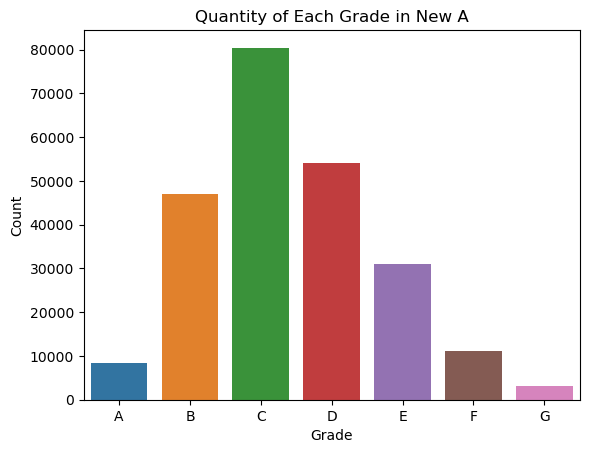

[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=  10.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=  10.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=  11.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=  12.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=  10.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=  12.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=  10.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=  12.5s
[CV] END max_depth=20, max_features=auto, min_sa

In [40]:
sns.barplot(x=profitAg['grade'],y=profitAg['count'],order=['A', 'B', 'C','D','E','F','G'])
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Quantity of Each Grade in New A')
plt.rcParams['figure.figsize']=(12,3)
plt.show